# **Research Workshop code**

### **Importing relevant packages**

In [64]:
#!pip install nltk
#!pip uninstall scikit-learn
#!pip install scikit-learn
!pip install imbalanced-learn


In [1]:
# nltk - sentiment analysis
import nltk                       
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "averaged_perceptron_tagger",
     "wordnet",
     "vader_lexicon",
     "punkt"])

# word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

# stop words 
from nltk.corpus import stopwords

# lemmatizer
from nltk.stem import WordNetLemmatizer

#word stemmer
from nltk.stem import PorterStemmer

#wordcloud
from wordcloud import WordCloud # word cloud

# text
from nltk.text import Text

# tf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score

# balancing data 
from imblearn.over_sampling import RandomOverSampler

import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
%matplotlib inline
from tabulate import tabulate

# sklearn
# train-test-split and GridSearch cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV

# import Random Forest model and Naive Bayes 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# pipeline
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\annkr\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\annkr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\annkr\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\annkr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\annkr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\annkr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already

### **Loading the dataframe and getting some descriptive statistic**

In [32]:
from os import getcwd, listdir, chdir 
from os.path import join
diseases = ['ADHD','Anxiety', 'Bipolar', 'Depression', 'Schizophrenia']
frames = []
for i in diseases:
  frame = pd.read_csv(f"./{i}.csv",index_col=0) 
  frame["Drug"] = i
  frames.append(frame)

data = pd.concat(frames)
print(data)

# getting rid of zero scores 
data = data.loc[data['Score'] >= 1] 
print(data.shape)

# extracting positive, neutral and negative reviews: 
neg_data = data[data.Score <= 4] # 0-4 -> neg. reviews
neutral_data = data[(data.Score > 4) & (data.Score < 8)] # 5-7 -> neutral reviews
pos_data = data[data.Score >=8 ] # 8-10 -> pos. neg_reviews

print("\nnegative dataset: ",neg_data.shape)
print("neutral dataset: ",neutral_data.shape)
print("positive dataset: ",pos_data.shape,"\n")

# creating a new column with the polarity score 
def polarity_label(score):
  if score <= 4:
    return 0
  elif score > 4 and score < 8:
    return 1
  else:
    return 2

sentiment = []
for i in data.Score:
  s = polarity_label(i)
  sentiment.append(s)

data["Sentiment"] = sentiment
print("extended dataset: \n",data.head)

# making Reviews lower-case
data["Review"] = data["Review"].str.lower() 

print("Shape of Reviews: ",data["Review"].shape)
print("Type of Reviews:",type(data["Review"]))

print(data["Drug"].unique())
data.rename(columns={"Drug":"Disease"},inplace=True)
print(data.columns)

                                                               Review  Score  \
Drug                                                                           
Dexmethylphenidate  I have a 5 year old son. He started this medic...      1   
Dexmethylphenidate  This dexmethylphenidate is the only medication...     10   
Dexmethylphenidate  <b>Focalin (dexmethylphenidate):</b>\t\t\t Im...      0   
Dexmethylphenidate  <b>Focalin XR (dexmethylphenidate):</b>\t\t\t ...      0   
Dexmethylphenidate  I've been on Focalin XR 30mg from 15-17 and fr...     10   
...                                                               ...    ...   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t Invega is ...      0   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t I've had a...      0   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t My daughte...      0   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t Clears my ...      0   
Paliperidone        <b>Invega (paliperid

### **some Plotting**

1     1517
2      458
3      425
4      323
5      529
6      440
7      698
8     1507
9     2018
10    3292
Name: Score, dtype: int64


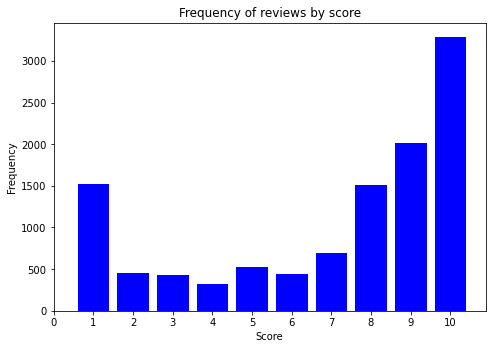

In [3]:
score_counts = data["Score"].value_counts(sort=True).sort_index()
print(score_counts)
score_counts = np.array(score_counts)
scores = list(range(1,11))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(scores,score_counts,linestyle='--', color='b')
ax.set_xticks(np.arange(len(scores)+1))
ax.set_ylabel('Frequency')
ax.set_xlabel("Score")
ax.set_title('Frequency of reviews by score')
plt.show()

missing values:
 Review       0
Score        0
Likes        0
Drug         0
Sentiment    0
dtype: int64
original dataset:
 <bound method NDFrame.head of                                                                Review  Score  \
Drug                                                                           
Dexmethylphenidate  i have a 5 year old son. he started this medic...      1   
Dexmethylphenidate  this dexmethylphenidate is the only medication...     10   
Dexmethylphenidate  i've been on focalin xr 30mg from 15-17 and fr...     10   
Dexmethylphenidate  really didn't like focalin. it was the first m...      2   
Dexmethylphenidate  i was previously on concerta, which just made ...      8   
...                                                               ...    ...   
Paliperidone        i have been on this paliperidone for 2 years. ...      9   
Paliperidone        this medication appears to have no side effect...      8   
Paliperidone        i have been on paliperidon

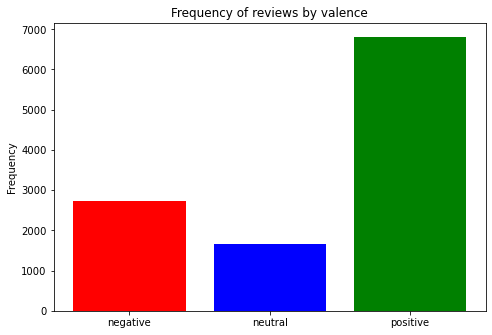

In [4]:
# checking for missing values 
print("missing values:\n",data.isnull().sum())

# checking the head and tail of the file 
print("original dataset:\n",data.head)

# combine all polarity frequencies into a list
polarity = ['negative', 'neutral', 'positive']
scores = [neg_data.shape[0], neutral_data.shape[0], pos_data.shape[0]]

for i in range(len(polarity)):
  print(f"length of {polarity[i]} reviews: {scores[i]}")

# plotting reviews
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(polarity,scores,color = ("r","b","g"))
ax.set_ylabel('Frequency')
ax.set_title('Frequency of reviews by valence')
plt.show()

In [ ]:
print(data.shape)
labels = ['negative', 'neutral', 'positive']
Anxiety = [0,0,0]
Depression = [0,0,0]
Schizophrenia = [0,0,0]
ADHD = [0,0,0]
Bipolar = [0,0,0]

def getcount(df,new_df):
    for i in range(len(df)):
        disease = df.iloc[i][]
    
for i in range(len(data)):
    disease = data.iloc[i]["Drug"].strip()
    sent = data.iloc[i]["Sentiment"]

print(Anxiety, Depression, Schizophrenia, ADHD, Bipolar)

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, Anxiety, width, label='Anxiety')
ax.bar(labels, Depression, width, bottom=Anxiety,
       label='Depression')
ax.bar(labels, Schizophrenia, width, bottom=Depression,
       label='Schizophrenia')
ax.bar(labels, ADHD, width, bottom=Schizophrenia,
       label='ADHD')
ax.bar(labels, Bipolar, width, bottom=ADHD,
       label='Bipolar')

ax.set_ylabel('Frequency')
ax.set_title('Frequency by disease and polarity')
ax.legend()

plt.show()

11207
    Sentiment        Disease  count
0           0           ADHD    509
1           0        Anxiety    867
2           0        Bipolar    546
3           0     Depression    649
4           0  Schizophrenia    152
5           1           ADHD    316
6           1        Anxiety    471
7           1        Bipolar    320
8           1     Depression    473
9           1  Schizophrenia     87
10          2           ADHD   1123
11          2        Anxiety   2573
12          2        Bipolar   1433
13          2     Depression   1539
14          2  Schizophrenia    149
          ADHD  Anxiety  Bipolar  Depression  Schizophrenia
negative   509      867      546         649            152
neutral    316      471      320         473             87
positive  1123     2573     1433        1539            149


<IPython.core.display.Javascript object>


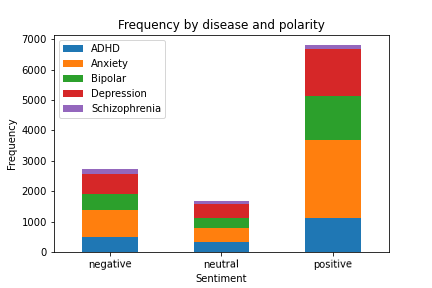

In [112]:


%matplotlib notebook
freq = data.groupby(by=["Sentiment","Disease"],axis=0).size().reset_index(name="count")
print(sum(freq["count"]))
print(freq)

width = 0.35       # the width of the bars: can also be len(x) sequence

df_final=(pd.DataFrame(freq.groupby(freq["Sentiment"])['count'].apply(list).values.tolist(),columns=['ADHD','Anxiety','Bipolar',"Depression","Schizophrenia"]))
df_final.rename(index={0:"negative",1:"neutral",2:"positive"},inplace=True)
print(df_final)

labels = ['negative', 'neutral', 'positive']
plt = df_final.plot(kind='bar', stacked=True,xlabel="Sentiment",ylabel="Frequency",title="Frequency by disease and polarity",rot=1)
figure = plt.get_figure()
figure.savefig("frequency.png")

### **Extracting pos, neg., neutral words**

In [74]:
# writing function first that receives a dataframe and outputs four string with all words, based on the sentiment column
def extract_sentiment_words(data, col_review = "Review", col_sentiment = "Sentiment"): 
  # constructing a string since this is required for the WordCloud 
  words_as_string = "" # all words
  poswords_as_string = "" # words from pos. reviews
  neutralwords_as_string = "" # words from neutral reviews
  negwords_as_string = "" # words from neg. reviews 

  for r in range(len(data[col_review])):
    text = data[col_review][r] # extracting review (string)
    polarity = data[col_sentiment][r] # extracting polarity score (0,1,2)
    words_as_string += text # adding review to string
    if polarity == 0:          # checking whether review is negative
      negwords_as_string += text 
    elif polarity == 1:        # checking whether review is neutral
      neutralwords_as_string += text
    elif polarity == 2:        # checking whether review is positive
      poswords_as_string += text
  return words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string

### **Generating word cloud (1) - before cleaning**

In [77]:
# function to generate word clouds
def display_wordcloud(axes, list_of_strings, names):
  # Display the generated image:
  # I now loop over all words, the pos.,neg.,neutral words and generate a wordcloud for all of them (this gives us 4 plots in total)
  for iAx, txt, tlt in zip(axes,list_of_strings, names):
    plt.figure(iAx,figsize=(12,12))
    # getting the wordcloud of all words, pos/neg/neutral words 
    wordcloud = WordCloud().generate(txt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"{tlt}")
    plt.axis("off")

  plt.show()

<class 'str'>
pos string: this dexmethylphenidate is the only medication i have tried thus far for my adhd that has had a good...
length of pos strings:3472603, length of neutral strings: 845263, length of negative strings: 845263


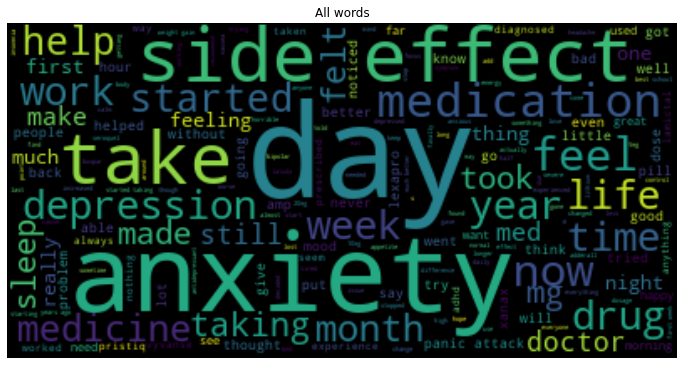

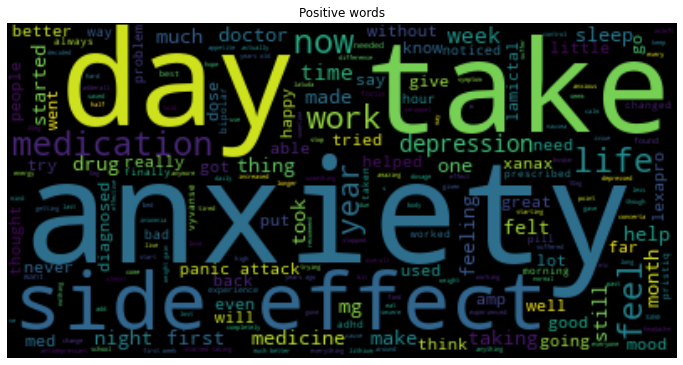

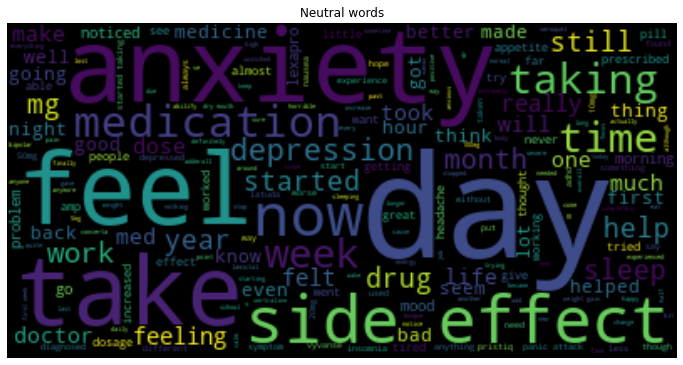

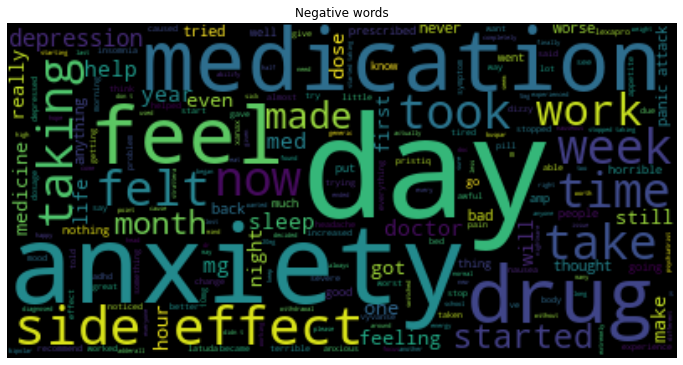

In [78]:
# getting 4 strings with all, pos, negative and neutral words
words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string = extract_sentiment_words(data) 

print(type(words_as_string)) # now we have a string we can work with 
print(f"pos string: {poswords_as_string[:100]}...")
print(f"length of pos strings:{len(poswords_as_string)}, length of neutral strings: {len(neutralwords_as_string)}, length of negative strings: {len(neutralwords_as_string)}")

display_wordcloud([0,1,2,3], [words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string], \
                  ["All words","Positive words", "Neutral words","Negative words"])

### **Getting frequency distributions(1) - before cleaning** 

In [79]:
# function to get frequency distributions 
def freqdist(string, numb):
  token = word_tokenize(string)
  fd = nltk.FreqDist(token)
  return fd.most_common(numb)

In [80]:
# frequencies of words before cleaning (notice that the most common words are all stopwords that don't provide extra meaning)
fd_all_words = freqdist(words_as_string,50)
fd_pos_words = freqdist(poswords_as_string,50)
fd_neutral_words = freqdist(neutralwords_as_string,50)
fd_neg_words = freqdist(negwords_as_string,50)

print("Frequencies of 50 most frequent words:", fd_all_words)
print("Frequencies of 50 most frequent positive words:", fd_pos_words)
print("Frequencies of 50 most frequent neutral words:", fd_neutral_words)
print("Frequencies of 50 most frequent negative words:", fd_neg_words)

Frequencies of 50 most frequent words: [('i', 59835), ('.', 55985), (',', 34755), ('and', 34564), ('to', 25971), ('the', 25912), ('it', 23273), ('a', 22385), ('my', 20328), ('for', 16062), ('was', 13577), ('of', 13349), ('have', 11783), ('me', 11364), ('on', 11021), ('in', 9681), ('but', 9368), ('this', 9278), ('with', 8532), ('is', 8386), ('that', 7933), ('anxiety', 6794), ("n't", 6678), ('been', 6293), ('not', 6104), ('so', 6053), ('had', 6032), ('at', 5493), ('!', 4867), ('feel', 4863), ('taking', 4846), ('as', 4789), ('am', 4628), ('has', 4577), ('side', 4407), ('take', 4326), ('day', 4252), ('now', 4241), ('like', 4018), ('do', 4007), ('after', 3952), ('effects', 3822), ("'m", 3813), ('about', 3693), (')', 3684), ('years', 3684), ('all', 3665), ('you', 3644), ('life', 3592), ('(', 3579)]
Frequencies of 50 most frequent positive words: [('i', 37966), ('.', 35228), ('and', 22187), (',', 21340), ('the', 15886), ('to', 15861), ('a', 14569), ('it', 14310), ('my', 12992), ('for', 10074)

### **Functions for removing stop words and cleaning text**

In [82]:
# function that gets list as input and converts all elements into lower-case
import string as st

# puts list of strings into lowercase
def lower(mylist): # tokens is a list of strings
  lowertokens = []
  for t in mylist:
    lowertokens.append(t.lower())
  return lowertokens

# removes punctuation signs of a string
def removePunctuation(string, punctuation = st.punctuation): #st.punctuation is an inbuilt list of punctuation signs
  cleaned = ""
  for c in string:
    if c not in punctuation:
      cleaned += c
  return cleaned

# removes spaces of a string
def removeSpaces(string):
  while " " in string:
    string = string.replace(" ","")
  return string

#gets root of word
def Lemmatizer(tokens):
  newtokens = []
  lemmatizer = WordNetLemmatizer()
  for word in tokens:
    newtokens.append(lemmatizer.lemmatize(word))
  return newtokens

# gets word stem 
def Stemmer(tokens):
  newtokens = []
  ps = PorterStemmer()
  for word in tokens:
    newtokens.append(ps.stem(word))
  return newtokens

# function that removes stopwords from a given list of words
def removeStopWords(tokens, stopwords): # tokens and stopwords are lists
  newtokens = []
  for t in tokens: # going over words in tokens 
    for med in medicine:
      if med in t:
        break
    else:
      t = removeNum(t)
      if t not in stopwords:
        newtokens.append(t) #appending cleaned word to list if it is not a stopword
  newtokens = list(filter(None, newtokens))
  if len(newtokens) < 1:
    return np.nan
  
  return newtokens

def removeNum(word):
  number = "01234567890"
  w = ""
  for i in word:
    if i not in number:
      w += i
  return w

# this is the main function that cleans the whole Review column, using the functions from above 
def cleaning_reviews(df_col, stopwords ):
  df_col = df_col.apply(removePunctuation)# remove punctuation and symbols
  df_col = df_col.str.split(" ") # tokenizing text
  #df_col = df_col.apply(Lemmatizer) # lemmatizing text
  #df_col = df_col.apply(Stemmer) # stemming text
  df_col = df_col.apply(removeStopWords, args=(stopwords,)) # removing stop words
  return df_col

def token_to_string(tokens): # gets tokens and returns string
  return " ".join(tokens)

### **Result dataframe**

In [83]:
result_dataframe = pd.DataFrame(columns = ["Disease","Model","Parameters","Class","Precision","Recall","F-score","Accuracy","stopwords","engrams"])
#result_dataframe = read.csv("report.csv")

### **Defining stop words**

In [84]:
from os import listdir, getcwd, chdir
from os.path import join
# creating lists of stopwords 
wordsToRemove = []

# reading file with names of medicines which we want to add to the stop words
medicine = pd.read_csv("./Estructuras.csv")
medicine = medicine["Name"] # getting medicine names out of dataframe
medicine = list(medicine) # converting it to a list
medicine = lower(medicine)
print("First 5 medicine stopwords: ",medicine, "checking medicine type: ",type(medicine))
wordsToRemove.extend(medicine) # appending medicines to stopwords

# reading file with words to be removed, provided by drugs.com
word = open("./WordsToRemove.txt")  # I commented this one out, and made a line with a pathway you can use when files are downloaded and uploaded in the colab file
givenstopwords = word.readlines()
for i in range(len(givenstopwords)): #  cleaning the words form the file since there is newline character after each word
  givenstopwords[i] = givenstopwords[i].replace("\n","") 
print("First 5 entries of WordsToRemove stopwords: ",givenstopwords[:5])
wordsToRemove.extend(givenstopwords) # appending words to stopwords

# adding more words and characters to be removed: 
wordsToRemove.extend(["amp","d","t","s","ve","m","a", "im", "like", "years"])
wordsToRemove.extend([" d", "n t"," m","/b","ll", "b"])
wordsToRemove.extend([">","<",":",";","&","%","(", ")", "!", "  ", ",",".", "'", " ", ",","''","-" ])


First 5 medicine stopwords:  ['abilify', 'abilify maintena', 'adderall', 'adderall xr', 'adzenys er', 'adzenys xr-odt', 'alprazolam intensol', 'anafranil', 'aplenzin', 'aptensio xr', 'aristada', 'ativan', 'aventyl hydrochloride', 'buspar', 'budeprion sr', 'budeprion xl', 'caplyta', 'celexa', 'clozaril', 'concerta', 'cotempla xr-odt', 'cymbalta', 'daytrana', 'depakote', 'depakote er', 'deplin', 'desoxyn', 'desyrel', 'dexedrine', 'diazepam intensol', 'dyanavel xr', 'effexor', 'effexor xr', 'emsam', 'equetro', 'evekeo', 'fanapt', 'fetzima', 'focalin', 'focalin xr', 'forfivo xl', 'geodon', 'intuniv', 'invega', 'invega sustenna', 'invega trinza', 'kapvay', 'lamictal', 'lamictal odt', 'latuda', 'lexapro', 'lithobid', 'lorazepam intensol', 'marplan', 'metadate cd', 'methylin', 'methylin er', 'mydayis', 'nardil', 'norpramin', 'pamelor', 'parnate', 'paxil', 'paxil cr', 'pexeva', 'pristiq', 'procentra', 'prozac', 'quillivant xr', 'remeron', 'remeron soltab', 'rexulti', 'risperdal', 'risperdal co

In [85]:
meaningless_words = ["feel", "day", "prozac","bprozac", "fluoxetine", "medicine", "drug","year", "week", "month", "taking","xr","xl","mg"] # looking at the cloud,   took (, "depression", "anxiety") out of the list given that they may influence the algorithms and need to stay in (Chris)
meaningless_words += ["got", "made", "get", "ive", "would", "also", "started", "bklonopin","bvistaril", "took", "months", "weeks", "bwellbutrin", "youll", "side", "effects"] # words that are important, but don't really have meaning, removed after the frequency histograms
meaningless_words += ["son","grades","dont", "really", "much","anxiety","days","foxus","worked","appetite","ok","best","tried","changed","hallucinations","voices","paranoia","symptoms","overall","less","gain","gained","schizophrenia","cant","since","back","makes","effect","help","make","depression","depressed","know","things","mood","eating","disorder","however","diagnosed","attacks","panic","prescribed","batarax","didnt","hours","lost","even","around","able","college","sustenna"]# Chris addition
meaningless_words += ["mental", "felt","work","better","go","feeling","went","going","helped","think","thoughts","getting"] # Ann stopwords
meaningless_words += ["work","works","\\x92","felt","talks","talk","feeling","works","worked","better","well","focus","medications","helps","helped","focused","put","times","go","never","mania"]
meaningless_words += ["went","going","noticed","always","think","meds","thing","worse","severe","thoughts","see","nausea","increased","people"]
meaningless_words += ["getting", "without","lbs","though","last","mouth","done","attack","need","needed","say","stopped","ever","almost","ever","episodes","many","insomnia","try","antidepressant","suicidal","used","maintena","psychosis","antipsychotics","psychotic","delusions"]
meaningless_words += ["anything","doesnt","gave","give","attention","different","difference","tired","anxious","long","couldnt","normal","episode","working","don","antidepressants","gone","ve","want"]
meaningless_words += ["nothing","loss","extremely","dr","don","medicines","something","daughter","ii","taken","kg","sometimes","recommend"]
meaningless_words += ["dr","ii","\\x92","batarax","sustenna"]
 

In [86]:
wordsToRemove.extend(meaningless_words)

# adding English stop words from in-built library
stopwords_eng = nltk.corpus.stopwords.words("english") 
print("First 5 stopwords from corpus.stopwords library", stopwords_eng[:5])
wordsToRemove.extend(stopwords_eng)

# making wordsToRemove lower-case
wordsToRemove = lower(wordsToRemove)

print("First and last 5 stopwords from our stopword list: ",wordsToRemove[:5], wordsToRemove[-5:])

First 5 stopwords from corpus.stopwords library ['i', 'me', 'my', 'myself', 'we']
First and last 5 stopwords from our stopword list:  ['abilify', 'abilify maintena', 'adderall', 'adderall xr', 'adzenys er'] ["weren't", 'won', "won't", 'wouldn', "wouldn't"]


### **Cleaning reviews**

In [87]:
# creating copy of data with non-cleaned data
data2 = data.copy(deep = True)

data = data2.copy(deep = True)
data['Review'] = cleaning_reviews(data['Review'], wordsToRemove) # cleaning the Review column using the previous functions
data = data.dropna()
data["Review_string"] = data["Review"].apply(token_to_string) # adding extra column which has reviews as string 
print("Cleaned reviews: ",data['Review'].head)

Cleaned reviews:  <bound method NDFrame.head of Drug
Dexmethylphenidate    [zombified, cannot, complete, sentence, hes, ...
Dexmethylphenidate    [thus, clearly, motivation, productive, member...
Dexmethylphenidate    [period, insurance, recently, regular, noonpm,...
Dexmethylphenidate    [person, enjoys, sick, thought, id, end, motiv...
Dexmethylphenidate    [previously, scatter, brained, instead, focusi...
                                            ...                        
Paliperidone          [managing, quickly, lactation, sex, drive, any...
Paliperidone          [appears, lasting, sleepy, cry, early, yet, sl...
Paliperidone          [nearly, change, licensed, uk, starting, skept...
Paliperidone          [treated, negative, motivation, clearly, sexua...
Paliperidone          [results, proactive, lifestyle, including, uni...
Name: Review, Length: 11037, dtype: object>


In [88]:
# getting 4 strings with all, pos, negative and neutral words from cleaned dataset 
words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string = extract_sentiment_words(data,"Review_string" ) 
print(f"String of words of cleaned dataframe: {words_as_string[:100]}...")

String of words of cleaned dataframe: zombified cannot complete sentence hes confused trying low nobody hear doesnt walls behavior hitti...


### **Generating the word cloud (2) - after cleaning**

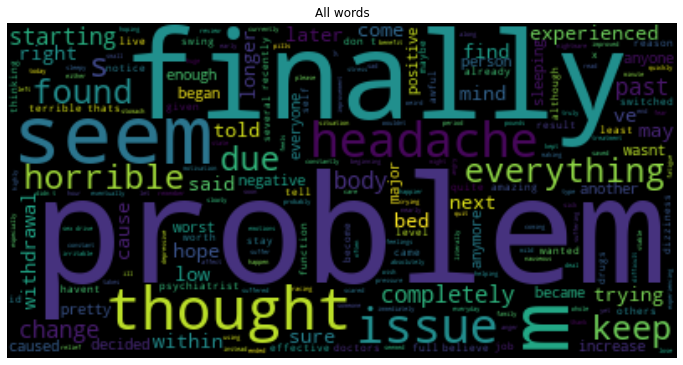

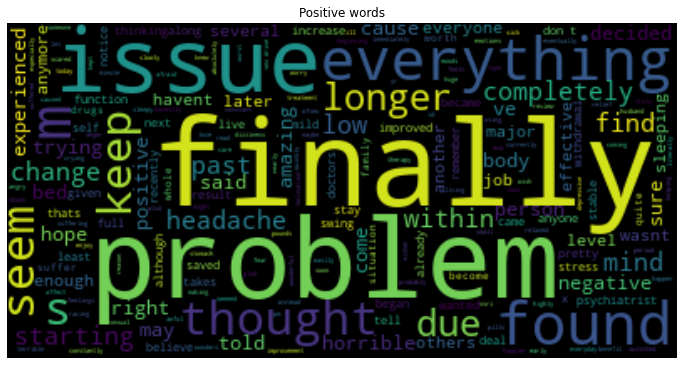

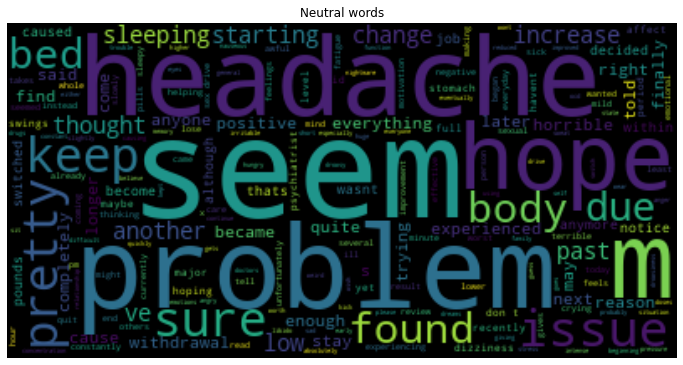

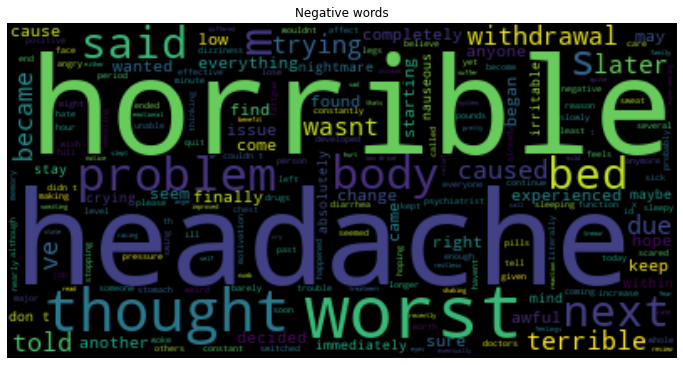

In [89]:
display_wordcloud([0,1,2,3], [words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string], \
                  ["All words","Positive words", "Neutral words","Negative words"])

### **Frequency distribution(2) - after cleaning**

In [90]:
# getting 50 most common words
print("Most frequent 50 words: \n",freqdist(words_as_string, 50)) 
print("\nMost frequent 50 positive words: \n",freqdist(poswords_as_string, 50))
print("\nMost frequent 50 neutral words: \n",freqdist(neutralwords_as_string, 50))
print("\nMost frequent 50 negative words: \n",freqdist(negwords_as_string, 50))

Most frequent 50 words: 
 [('finally', 800), ('thought', 670), ('i\x92m', 640), ('found', 587), ('body', 585), ('everything', 576), ('due', 545), ('within', 542), ('completely', 537), ('right', 531), ('find', 518), ('horrible', 518), ('bed', 515), ('starting', 513), ('experienced', 504), ('mind', 500), ('trying', 493), ('hope', 490), ('low', 488), ('longer', 486), ('said', 482), ('told', 475), ('past', 473), ('problems', 469), ('issues', 466), ('sleeping', 466), ('may', 464), ('keep', 458), ('wasnt', 451), ('change', 441), ('later', 440), ('headaches', 440), ('sure', 433), ('decided', 431), ('negative', 419), ('positive', 417), ('person', 412), ('next', 405), ('anyone', 399), ('it\x92s', 398), ('stomach', 397), ('became', 397), ('another', 395), ('enough', 393), ('seems', 387), ('psychiatrist', 383), ('anymore', 377), ('problem', 373), ('began', 370), ('stay', 367)]

Most frequent 50 positive words: 
 [('finally', 621), ('thought', 409), ('found', 404), ('everything', 382), ('i\x92m', 

### **Splitting data**

In [91]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# splitting the data per disease
xs = []
ys = []
for i in diseases:   #sorting by disease for the conclusion at the end
  X = data.loc[data["Drug"] == i,"Review"]
  xs.append(X)
  y = data.loc[data["Drug"] == i,"Sentiment"]
  ys.append(y)

#The resulting sets for train, test and val data. Saved in the order of the diseases list from the beginning
testSet= [] 
trainSet = []

for i in range(len(diseases)):
  print(diseases[i])
  X = xs[i]
  y = ys[i]
  print("Shape of X and y: ",X.shape,y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) 
  print(f"X_train: {X_train.shape}, X_test: {X_test.shape}") # 80 % training data, 10 % test data, 10 % validation data
  
  trainSet.append((X_train, y_train))
  testSet.append((X_test, y_test))

ADHD
Shape of X and y:  (1913,) (1913,)
X_train: (1530,), X_test: (383,)
Anxiety
Shape of X and y:  (3841,) (3841,)
X_train: (3072,), X_test: (769,)
Bipolar
Shape of X and y:  (2267,) (2267,)
X_train: (1813,), X_test: (454,)
Depression
Shape of X and y:  (2633,) (2633,)
X_train: (2106,), X_test: (527,)
Schizophrenia
Shape of X and y:  (383,) (383,)
X_train: (306,), X_test: (77,)


### **Vectorization after splitting data**

In [92]:
# Transformation after splitting data: 
tfs = []

for i in range(len(diseases)):
  print(diseases[i])
  #We need a new vectorizer for each disease for the analysis at the end
  tfidf  = TfidfVectorizer(ngram_range=(1,2),min_df=3) #min_df = 5 means that terms which occur in less than 5 documents are ignored
  X_train = trainSet[i][0]
  X_test = testSet[i][0]

  # fitting training data 
  vector_data_train = X_train.str.join(" ") # The vectorizer needs whole sentences to find the occurences
  tfidf_vectors_train = tfidf.fit_transform(vector_data_train) # Use the build in functions to determine the values
  #df_train = pd.DataFrame(tfidf_vectors_train[0].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]) #Showing the transformation for the first entry
  #print("Training data: \n",df_train.sort_values(by = ["tfidf"],ascending=False))
  print(f"shape tfidf training data: {tfidf_vectors_train.shape}")

  # fitting test data 
  vector_data_test = X_test.str.join(" ") # The vectorizer needs whole sentences to find the occurences
  tfidf_vectors_test = tfidf.transform(vector_data_test) # Use the build in functions to determine the values
  #df_test = pd.DataFrame(tfidf_vectors_test[0].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]) #Showing the transformation for the first entry
  #print("Test data: \n",df_test.sort_values(by = ["tfidf"],ascending=False))
  print(f"shape tfidf test data: {tfidf_vectors_test.shape}\n")

  tfs.append((tfidf, tfidf_vectors_train, tfidf_vectors_test)) #Save the changed data for the models as tuple to differ between the diseases



ADHD
shape tfidf training data: (1530, 2189)
shape tfidf test data: (383, 2189)

Anxiety
shape tfidf training data: (3072, 3195)
shape tfidf test data: (769, 3195)

Bipolar
shape tfidf training data: (1813, 2272)
shape tfidf test data: (454, 2272)

Depression
shape tfidf training data: (2106, 2626)
shape tfidf test data: (527, 2626)

Schizophrenia
shape tfidf training data: (306, 526)
shape tfidf test data: (77, 526)



### **Building model**

#### **Random Forest with balancing data**

In [93]:
param_grid = [{'max_depth':[None,2,100,500],'n_estimators':[100,500,1000],'min_samples_split': [2,10,100]}] # to be adjusted
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5) # gridsearch with 5-fold cross-validation
ros = RandomOverSampler(random_state=42)
tfidf_vectors_train, y_train= ros.fit_resample(tfidf_vectors_train, y_train)
grid_search.fit(tfidf_vectors_train, y_train)

print(f"Training accuracy: {grid_search.score(tfidf_vectors_train, y_train)}") # training score
print(f"Best parameters: {grid_search.best_params_}") # best parameters
print(f"Best cross-validation score: {grid_search.best_score_}") # best cross-validation score 
print(f"Best estimator: {grid_search.best_estimator_}")

# best parameters: 
# max_depth = None
# min_samples_split = 2
# n_estimators = 100

Training accuracy: 0.975609756097561
Best parameters: {'max_depth': 500, 'min_samples_split': 2, 'n_estimators': 1000}
Best cross-validation score: 0.6101073676416142
Best estimator: RandomForestClassifier(max_depth=500, n_estimators=1000)


ADHD
Classification Report:                precision    recall  f1-score   support

    negative       0.56      0.60      0.58       108
     neutral       0.24      0.10      0.14        63
    positive       0.68      0.77      0.72       212

    accuracy                           0.61       383
   macro avg       0.49      0.49      0.48       383
weighted avg       0.57      0.61      0.59       383



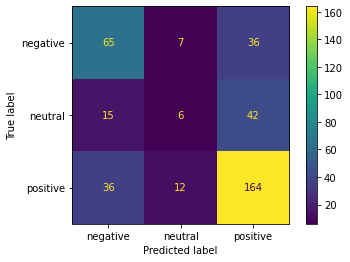

Training accuracy: 0.9992492492492493
Test accuracy: 0.6135770234986945

Anxiety
Classification Report:                precision    recall  f1-score   support

    negative       0.36      0.36      0.36       150
     neutral       0.06      0.02      0.03        89
    positive       0.75      0.84      0.79       530

    accuracy                           0.65       769
   macro avg       0.39      0.41      0.40       769
weighted avg       0.60      0.65      0.62       769



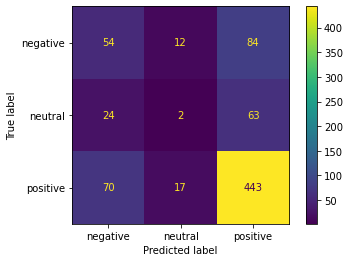

Training accuracy: 0.995987963891675
Test accuracy: 0.6488946684005201

Bipolar
Classification Report:                precision    recall  f1-score   support

    negative       0.47      0.54      0.50       104
     neutral       0.32      0.13      0.18        62
    positive       0.75      0.81      0.78       288

    accuracy                           0.65       454
   macro avg       0.51      0.49      0.49       454
weighted avg       0.63      0.65      0.63       454



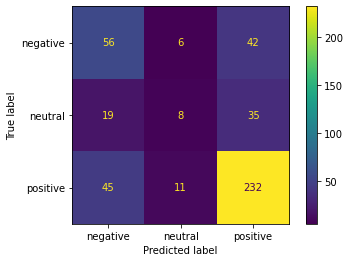

Training accuracy: 0.9985211475894705
Test accuracy: 0.6519823788546255

Depression
Classification Report:                precision    recall  f1-score   support

    negative       0.46      0.53      0.49       112
     neutral       0.28      0.11      0.16        92
    positive       0.72      0.80      0.76       323

    accuracy                           0.62       527
   macro avg       0.48      0.48      0.47       527
weighted avg       0.59      0.62      0.60       527



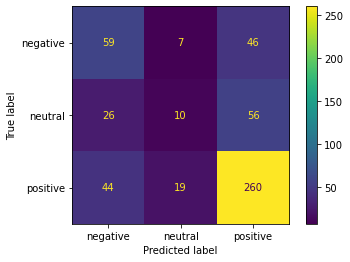

Training accuracy: 0.9983291562238931
Test accuracy: 0.6242884250474383

Schizophrenia
Classification Report:                precision    recall  f1-score   support

    negative       0.48      0.48      0.48        29
     neutral       0.29      0.44      0.35        18
    positive       0.55      0.37      0.44        30

    accuracy                           0.43        77
   macro avg       0.44      0.43      0.42        77
weighted avg       0.46      0.43      0.43        77



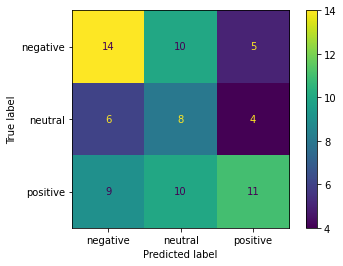

Training accuracy: 0.975609756097561
Test accuracy: 0.42857142857142855



In [94]:

rfs = [] # List containing the resulting models per disease for Random Forests
#Random Forest takse a very long time! Keep in mind
for i in range(len(diseases)): 
  print(diseases[i])

  #Retrieve the necessary values per disease
  tfidf_vectors_train = tfs[i][1]
  y_train = trainSet[i][1]
  
 # Resampling
  ros = RandomOverSampler(random_state=42)
  tfidf_vectors_train, y_train= ros.fit_resample(tfidf_vectors_train, y_train)

  tfidf_vectors_test = tfs[i][2]
  y_test = testSet[i][1]

# training classifier 
  rf_classifier = RandomForestClassifier(**grid_search.best_params_)# estimators based on the grid search10

  rf_classifier.fit(tfidf_vectors_train, y_train) # fitting training data 

  y_pred = rf_classifier.predict(tfidf_vectors_test)
  report = classification_report(y_test,y_pred, target_names=['negative', 'neutral', 'positive'], zero_division= 0)
  print('Classification Report: ', report)
    

  cf_matrix = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['negative', 'neutral', 'positive'])
  display.plot()
  plt.show()

  score_train = rf_classifier.score(tfidf_vectors_train, y_train) # training accuracy -> lol this is clearly overfitting rn
  print(f"Training accuracy: {score_train}")
  score_test = rf_classifier.score(tfidf_vectors_test, y_test) # test accuracy -> not too bad :) 
  print(f"Test accuracy: {score_test}") 
    
    # results for dataframe 
  precision = precision_score(y_test, y_pred,average=None) # neg., neutral, pos
  recall = recall_score(y_test, y_pred,average=None)
  f1 = f1_score(y_test, y_pred,average=None)
  accuracy = accuracy_score(y_test,y_pred)

    # appending results to dataframe 
  model = "RF" # Random Forest balanced
  exclude_stopwords = True
  engrams = "unigram-bigram"
  sentiments = ['negative', 'neutral', 'positive']
  disease = diseases[i]
  parameters = grid_search.best_params_
  for i in range(len(sentiments)):
    new_row = [[disease, model, parameters, sentiments[i], round(precision[i],2),round(recall[i],2),round(f1[i],2),round(accuracy,2),exclude_stopwords,engrams]]
    result_dataframe = result_dataframe.append(pd.DataFrame( new_row, columns=["Disease","Model","Parameters","Class","Precision","Recall","F-score","Accuracy","stopwords","engrams"]),ignore_index = True)

    # save models for later plotting
  rfs.append(rf_classifier) 
  print("")
    
result_dataframe.to_csv("report.csv")

#### **Naive Bayes with balancing data**

ADHD
Classification report:
                precision    recall  f1-score   support

    negative       0.53      0.52      0.53       108
     neutral       0.24      0.43      0.31        63
    positive       0.79      0.62      0.69       212

    accuracy                           0.56       383
   macro avg       0.52      0.52      0.51       383
weighted avg       0.63      0.56      0.58       383



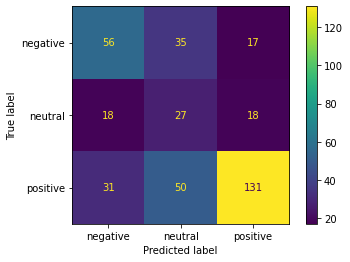

Training accuracy: 0.8993993993993994
Test accuracy: 0.5587467362924282

Anxiety
Classification report:
                precision    recall  f1-score   support

    negative       0.48      0.61      0.54       150
     neutral       0.12      0.19      0.15        89
    positive       0.82      0.69      0.75       530

    accuracy                           0.62       769
   macro avg       0.48      0.50      0.48       769
weighted avg       0.68      0.62      0.64       769



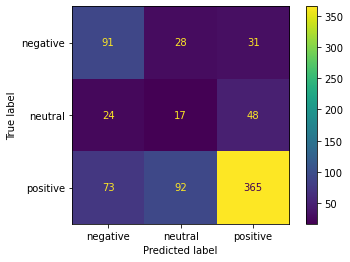

Training accuracy: 0.875794048813106
Test accuracy: 0.6150845253576073

Bipolar
Classification report:
                precision    recall  f1-score   support

    negative       0.55      0.54      0.55       104
     neutral       0.26      0.40      0.32        62
    positive       0.79      0.71      0.75       288

    accuracy                           0.63       454
   macro avg       0.54      0.55      0.54       454
weighted avg       0.67      0.63      0.64       454



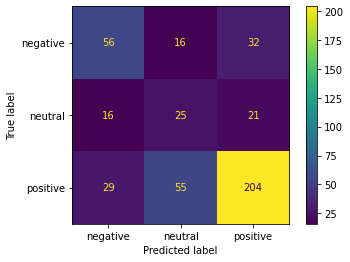

Training accuracy: 0.8958887902987281
Test accuracy: 0.6277533039647577

Depression
Classification report:
                precision    recall  f1-score   support

    negative       0.46      0.58      0.52       112
     neutral       0.31      0.37      0.34        92
    positive       0.79      0.68      0.73       323

    accuracy                           0.60       527
   macro avg       0.52      0.54      0.53       527
weighted avg       0.64      0.60      0.62       527



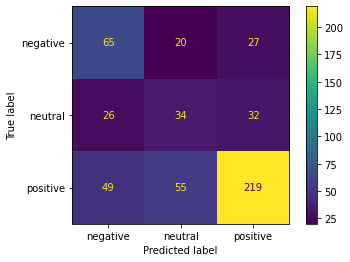

Training accuracy: 0.8922305764411027
Test accuracy: 0.603415559772296

Schizophrenia
Classification report:
                precision    recall  f1-score   support

    negative       0.58      0.52      0.55        29
     neutral       0.28      0.39      0.33        18
    positive       0.62      0.53      0.57        30

    accuracy                           0.49        77
   macro avg       0.49      0.48      0.48        77
weighted avg       0.52      0.49      0.50        77



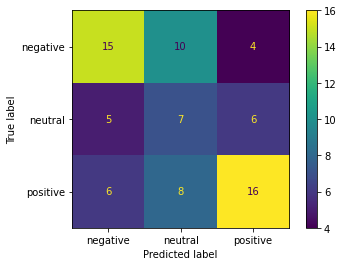

Training accuracy: 0.8834688346883469
Test accuracy: 0.4935064935064935



In [95]:
nbs =[] # List containing the resulting models per disease for Naive Bayes
for i in range(len(diseases)):
  print(diseases[i])

  #Retrieve the necessary values per disease
  tfidf_vectors_train = tfs[i][1]
  y_train = trainSet[i][1]

  tfidf_vectors_test = tfs[i][2]
  y_test = testSet[i][1]

  #print(f"initial shape training set:{tfidf_vectors_test.shape}, {y_train.shape}")

  ros = RandomOverSampler(random_state=42)
  tfidf_vectors_train, y_train= ros.fit_resample(tfidf_vectors_train, y_train)

  nb_classifier = MultinomialNB()
  nb_classifier.fit(tfidf_vectors_train, y_train)
  y_pred = nb_classifier.predict(tfidf_vectors_test)
  report = classification_report(y_test,y_pred, target_names=['negative', 'neutral', 'positive'], zero_division= 0)
  print('Classification report:\n ', report)

        # results for dataframe 
  precision = precision_score(y_test, y_pred,average=None) # neg., neutral, pos
  recall = recall_score(y_test, y_pred,average=None)
  f1 = f1_score(y_test, y_pred,average=None)
  accuracy = accuracy_score(y_test,y_pred)

    # appending results to dataframe 
  model = "NB" # Random Forest balanced
  exclude_stopwords = True
  engrams = "unigram-bigram"
  sentiments = ['negative', 'neutral', 'positive']
  disease = diseases[i]
  parameters = "-"
  for i in range(len(sentiments)):
    new_row = [[disease, model, parameters, sentiments[i], round(precision[i],2),round(recall[i],2),round(f1[i],2),round(accuracy,2),exclude_stopwords,engrams]]
    result_dataframe = result_dataframe.append(pd.DataFrame( new_row, columns=["Disease","Model","Parameters","Class","Precision","Recall","F-score","Accuracy","stopwords","engrams"]),ignore_index = True)

  cf_matrix = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['negative', 'neutral', 'positive'])
  display.plot()
  plt.show()

  score_train = nb_classifier.score(tfidf_vectors_train, y_train) 
  print(f"Training accuracy: {score_train}")
  score_test = nb_classifier.score(tfidf_vectors_test, y_test)
  print(f"Test accuracy: {score_test}") 

  nbs.append(nb_classifier)#Save the models for plotting afterwards
  print("")

In [96]:
result_dataframe.to_csv("report.csv")

### **Code for plotting**

In [97]:
import seaborn as sns

def impPlot(importances,names, title, quant): #Function to simply plot the words with the corresponding importances (not important to understand for the course if wanted to, just ask)
  if(quant > 1):
    fig, ax = plt.subplots(1,quant,figsize=(24,8))
    fig.suptitle(title[0])
    for i in range(quant):
      imp = np.array(importances[i])
      n = np.array(names[i])

      data={'feature_names':n,'feature_importance':imp}
      fi_df = pd.DataFrame(data)
      fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

      sns.barplot(ax=ax[i], x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
      ax[i].set_title(title[i+1])
    plt.show()
  else:
    imp = np.array(importances)
    n = np.array(names)
    
    data={'feature_names':n,'feature_importance':imp}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    plt.title(title)

    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    plt.show()

### **Plotting the feature importances**

ADHD


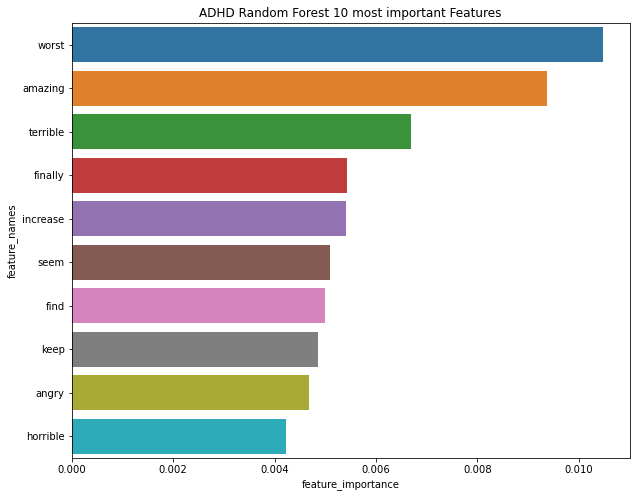

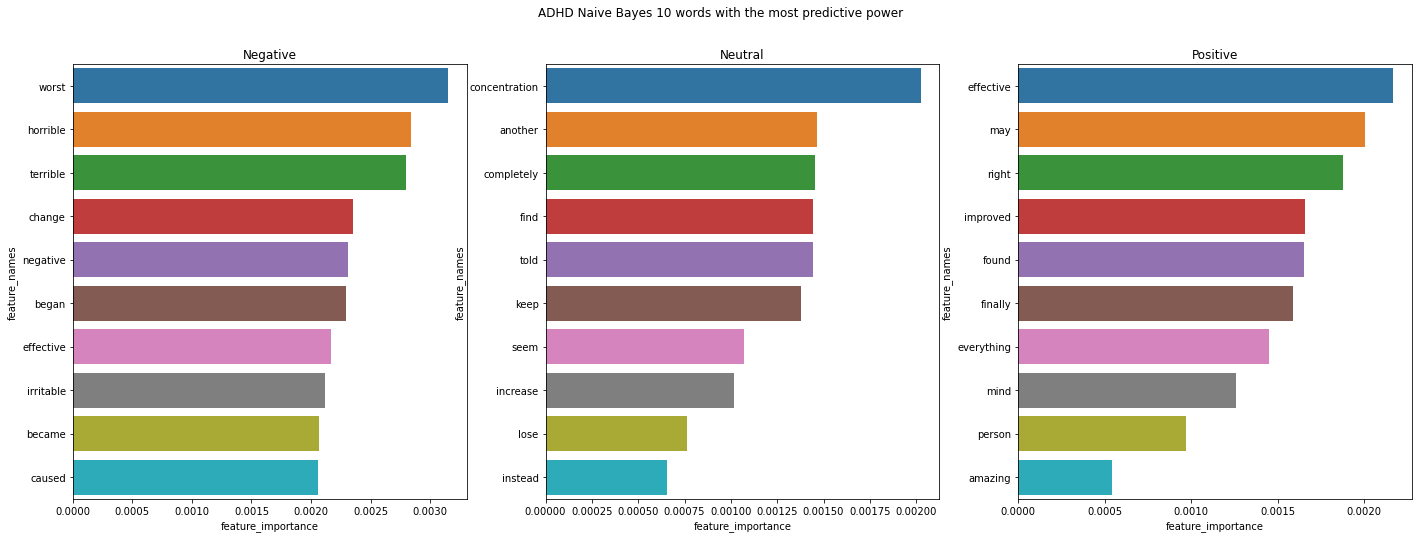


Anxiety


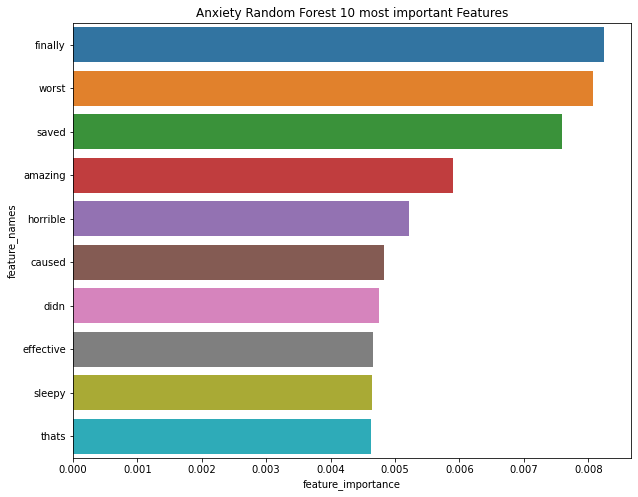

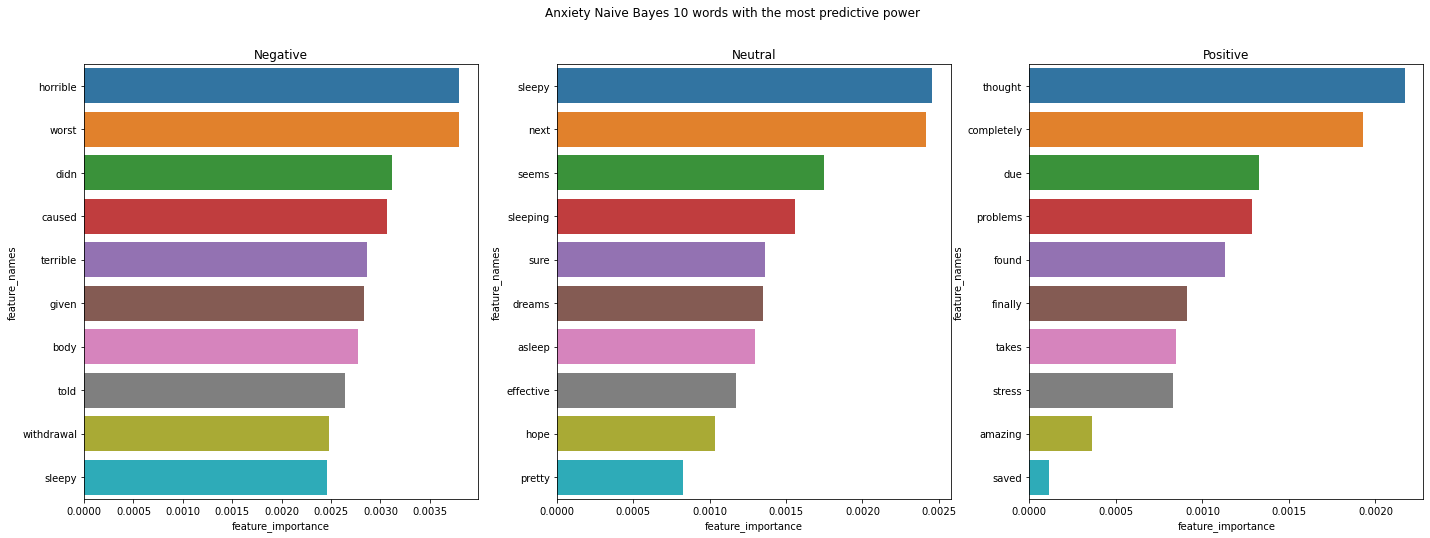


Bipolar


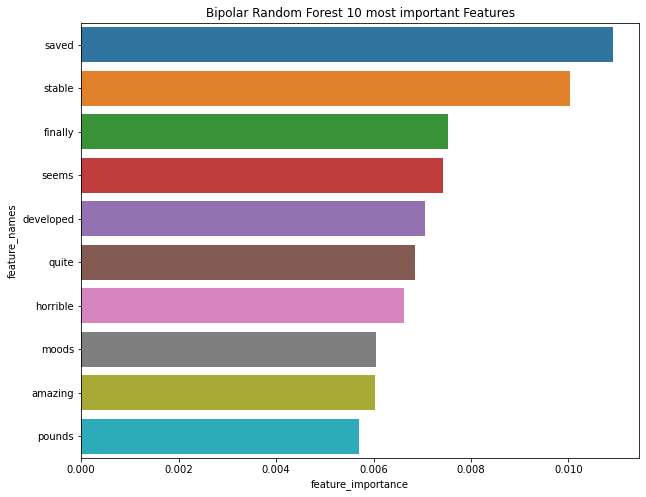

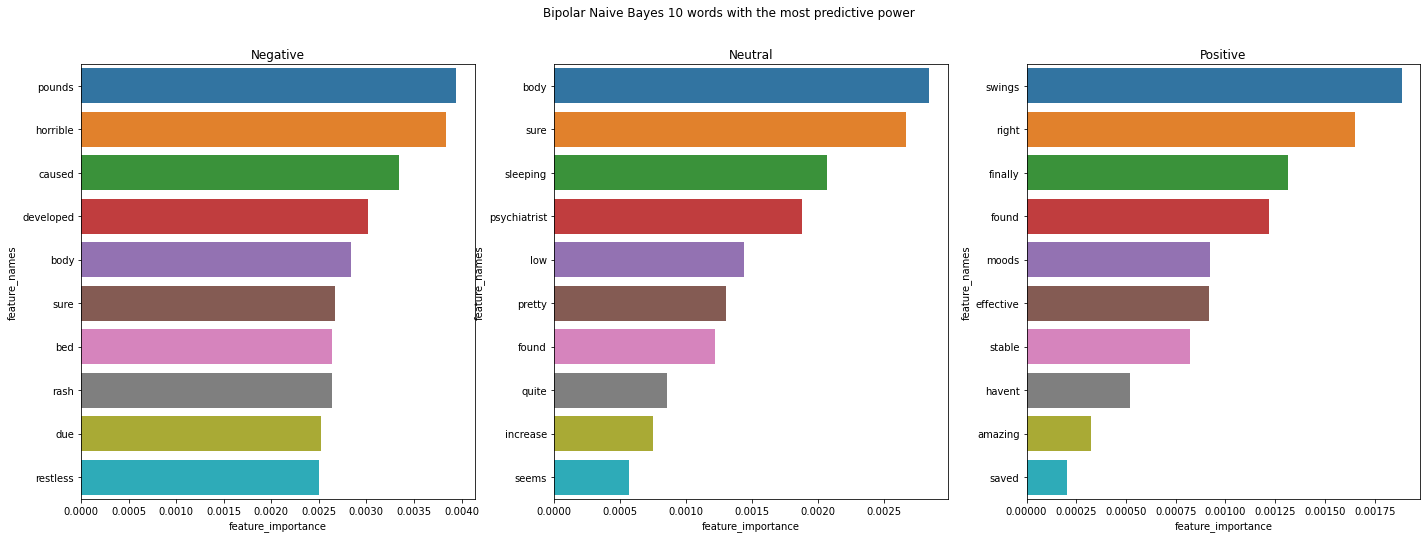


Depression


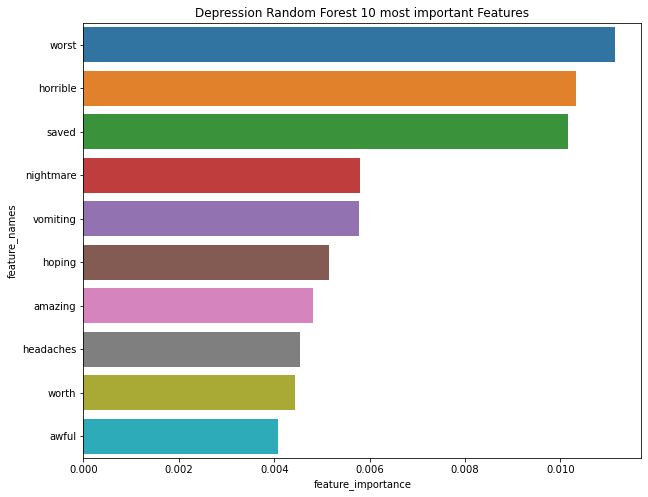

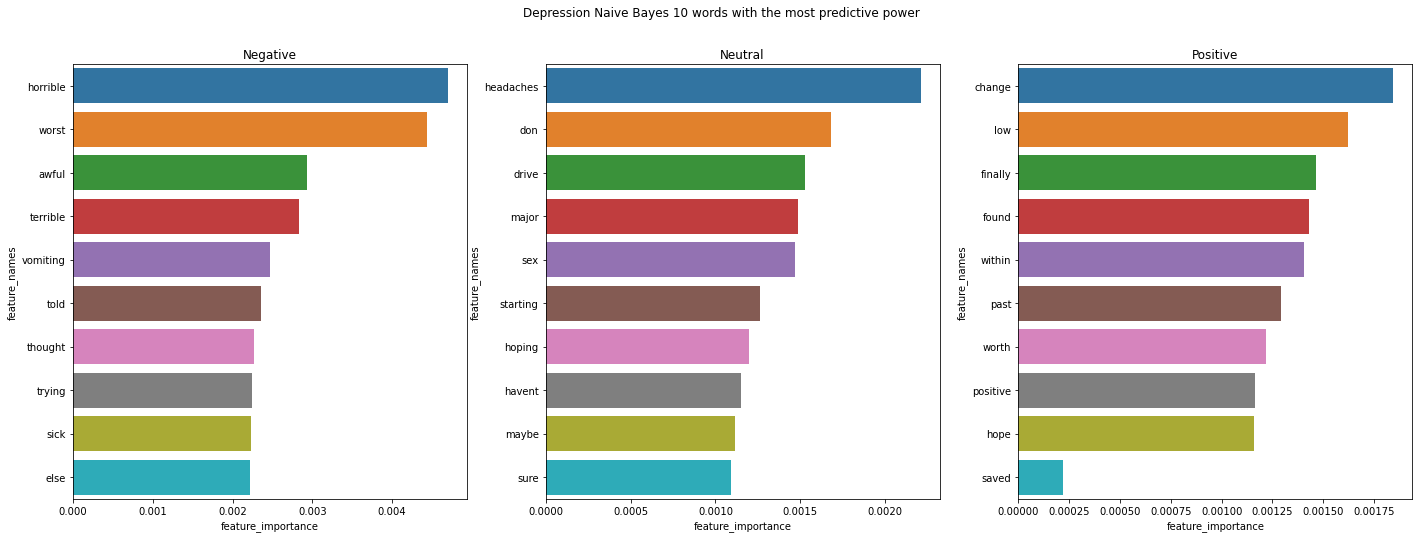


Schizophrenia


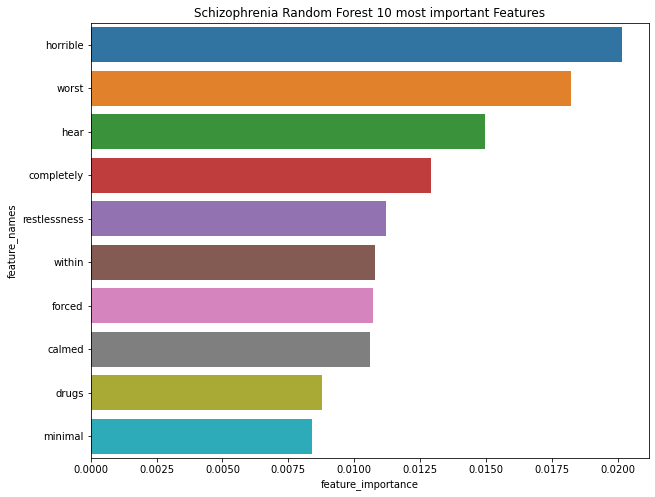

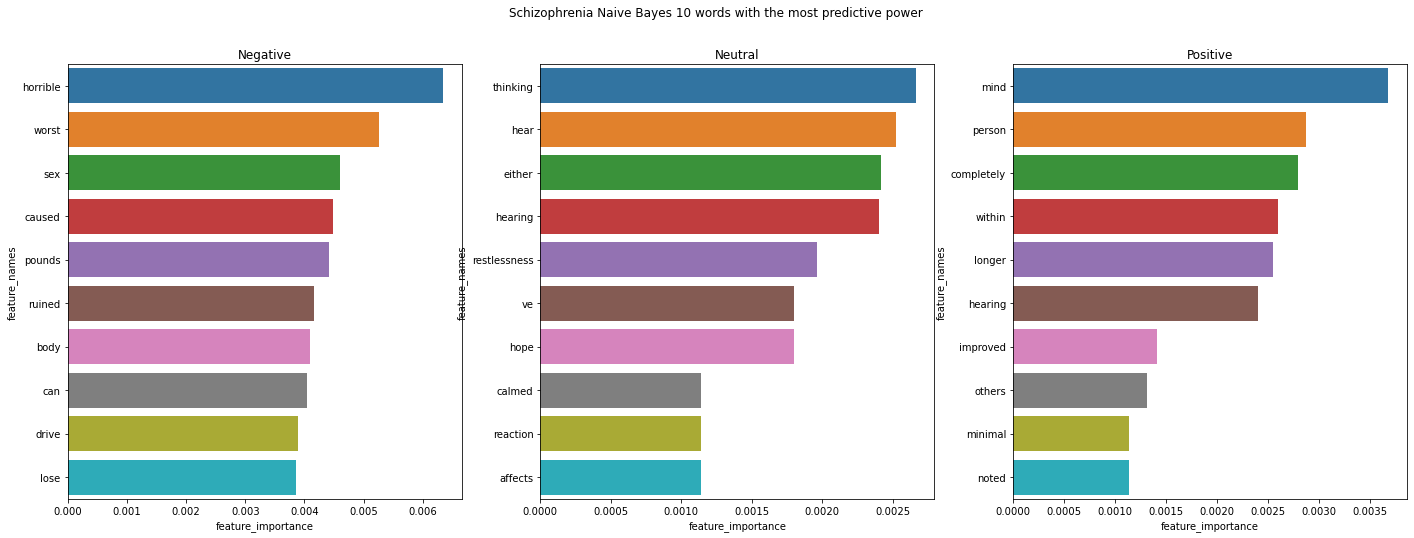

In [98]:
for i in range(len(diseases)):
  print(diseases[i])
  #Retrieving the necessary data for the plots(models and vectorizer)
  rf_classifier = rfs[i]
  nb_classifier = nbs[i]
  tfidf = tfs[i][0]

  #Plotting the Random Forest important features
  impPlot(rf_classifier.feature_importances_, tfidf.get_feature_names_out(),f"{diseases[i]} Random Forest 10 most important Features",1)

  #These give us the indices for the features that have the most predictive power in our Naive Bayes model.
  neg_class_prob_sorted = nb_classifier.feature_log_prob_[0, :].argsort()[::-1] 
  neut_class_prob_sorted = nb_classifier.feature_log_prob_[1, :].argsort()[::-1]
  pos_class_prob_sorted = nb_classifier.feature_log_prob_[2, :].argsort()[::-1]


  #We put all the values necessary into lists to forward them into the function defined at the beginning of this section.
  combImp = [np.exp(nb_classifier.feature_log_prob_[0, neg_class_prob_sorted[:10]]),np.exp(nb_classifier.feature_log_prob_[0, neut_class_prob_sorted[:10]]),np.exp(nb_classifier.feature_log_prob_[0, pos_class_prob_sorted[:10]])]
  combName = [np.take(tfidf.get_feature_names_out(), neg_class_prob_sorted[:10]), np.take(tfidf.get_feature_names_out(), neut_class_prob_sorted[:10]), np.take(tfidf.get_feature_names_out(), pos_class_prob_sorted[:10])]
  impPlot(combImp,combName,[f"{diseases[i]} Naive Bayes 10 words with the most predictive power","Negative","Neutral","Positive"],3)
  print("") #a small space to not overfill the inteface